# matplotlib: A Primer in Plotting & Visualization

This notebook is a basic demonstration of ploting & visualization using Matplotlib package. Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was designed to enable interactive MATLAB-style plotting via gnuplot from the IPython command line.

## Importing matplotlib

In Python we use shorthands for packages that either have long names or are frequently used in code. As we use the np shorthand for NumPy and pd for Pandas, we will use same shorthand convention for Matplotlib imports:

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

## Plotting

### Plotting from File

If you are using Matplotlib from within a script, the function plt.show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures. You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```sh
$ python myplot.py
```

### Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the `%matplotlib` command. Here, you also have the option of embedding graphics directly in the notebook, with two possible options:

- `%matplotlib notebook` will lead to interactive plots embedded within the notebook
- `%matplotlib inline` will lead to static images of your plot embedded in the notebook

Therefore, we import our packages and set plots as static images below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

It needs to be done only once per kernel/session. any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

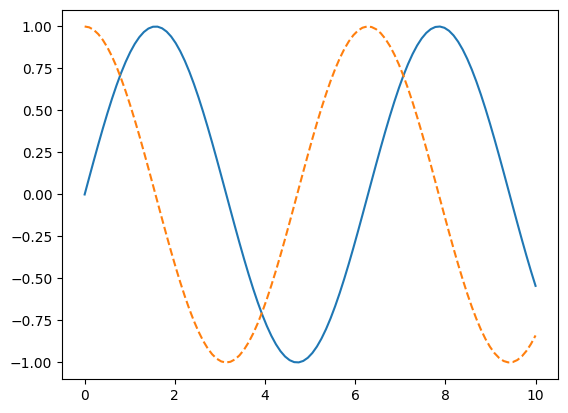

In [27]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

We can also save figures to files using the `savefig()` command.

```python
fig.savefig('my_figure.png')
```

We can load saved images in a notebook by:

```python
from IPython.display import Image
Image('my_figure.png')
```

### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users. For example, following code creates a figure in this style:

```python
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
```

### Object-oriented interface

When you want more control over your figure, rather than depending on some notion of an "active" figure or axes, you can use the plotting functions as methods of explicit Figure and Axes objects. 

```python
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));
```

## Styles

We can adjust the style by hand to make it a much more visually pleasing by using methods from Figure and Axes objects:

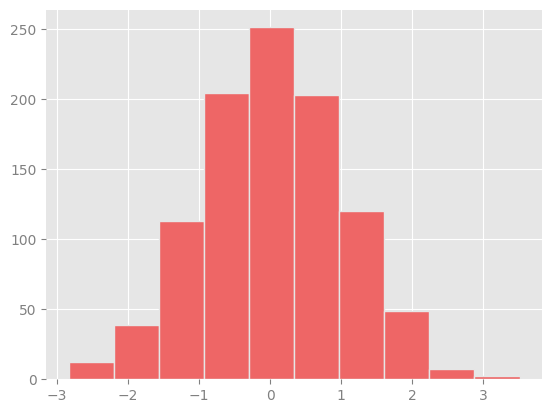

In [30]:
x = np.random.randn(1000)

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

We can also use the `plt.style` directive to choose appropriate aesthetic styles for our figures. The stylesheets used here are supported as of Matplotlib version 1.5 (>= 1.5). For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html). For example:

```python
plt.style.use('classic')
```

These stylesheets are formatted similarly to the `.matplotlibrc` files mentioned earlier, but must be named with a `.mplstyle` extension. The available styles are listed in `plt.style.available`:

In [25]:
len(plt.style.available)

28

In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Alternatively, you can use the style context manager, which sets a style temporarily:

```python
with plt.style.context('stylename'):
    make_a_plot()
```

Let's define a function to test these stylesheets.

In [49]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000), edgecolor='#E6E6E6')
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### FiveThiryEight style


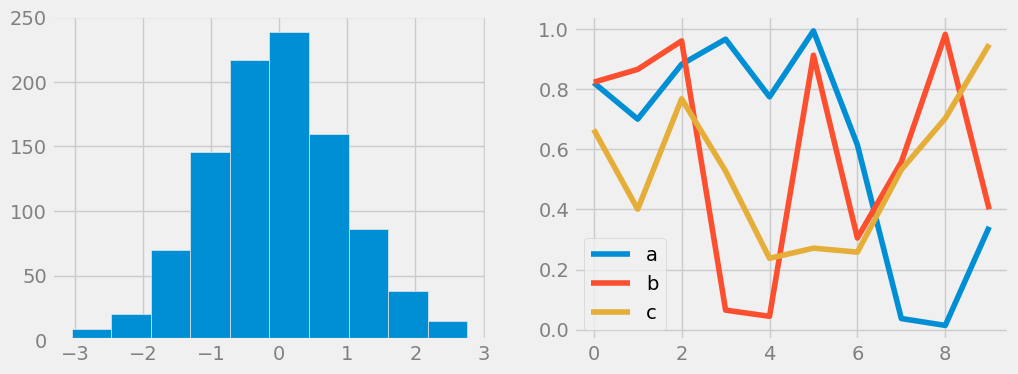

In [50]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

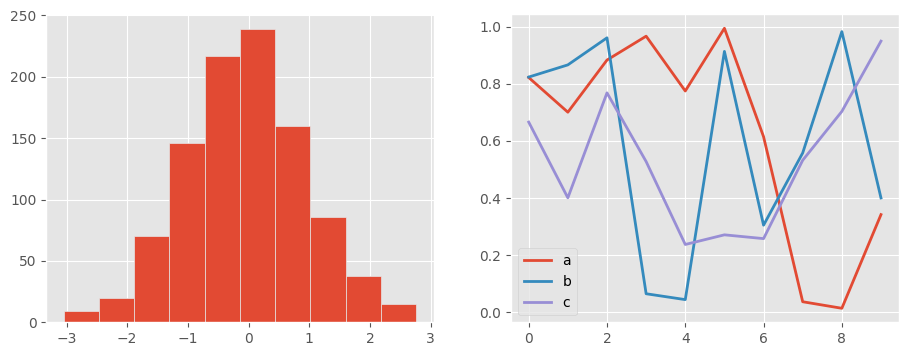

In [52]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Dark Background

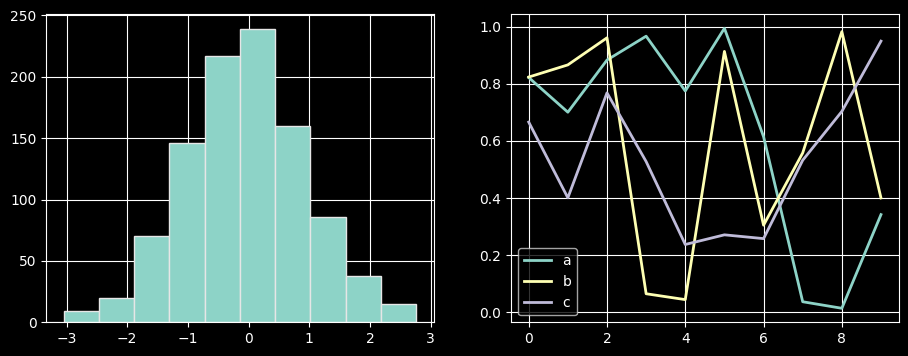

In [53]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Bayesian Methods for Hackers (style)

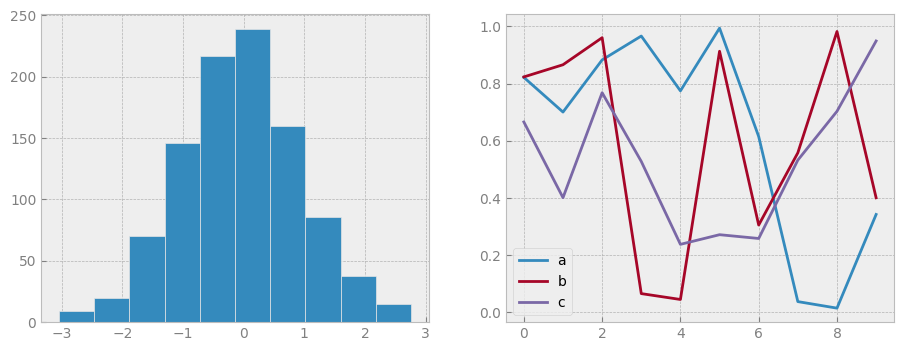

In [54]:
with plt.style.context('bmh'):
    hist_and_lines()

### Default style

Use `matplotlib.style.use('default')` or `rcdefaults()` to restore the default rcParams after changes.

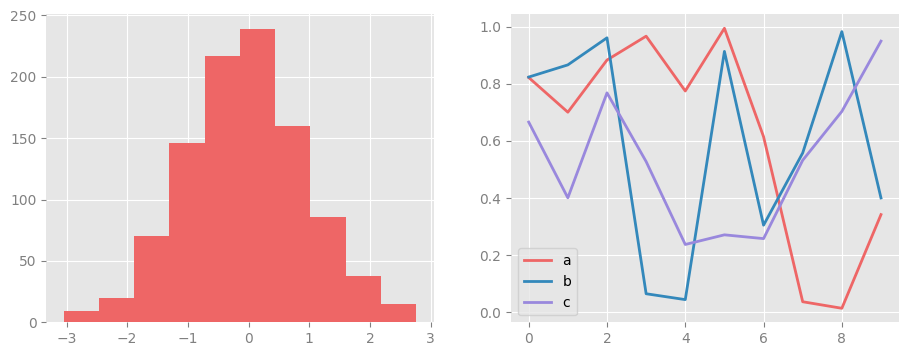

In [48]:
# reset global style: rcParams
plt.style.use('default')
hist_and_lines()

## Basic Mathematical Ploting

In this section, mathematical functions from numpy are used to generate input data. The minimum requirements for packages in this exercise is `numpy` and `matplotlib`. Furthermore, a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) (followed by `%` or `%%`) is used to enable the `matplotlib` inline backend for usage with the IPython Notebook.

Prepare data for the independent and dependent variables. The independent variable is defined as linear space that returns evenly spaced numbers over a specified interval. In our case, we prepare 100 samples in the range $[0, \pi/2]$. Using these samples, we calculate two sinusoids with mutual phase difference.

In [8]:
t = np.linspace(0, np.pi/2, num=100)  # linear space as independent var
# define range for the dependent vars
A = 2
f = 2
w = 2*np.pi*f
y1 = A*np.sin(w*t)
y2 = A*np.cos(w*t)

Then we use functions from `matplotlib.pylot` to plot, annotate, and stylize the figure.

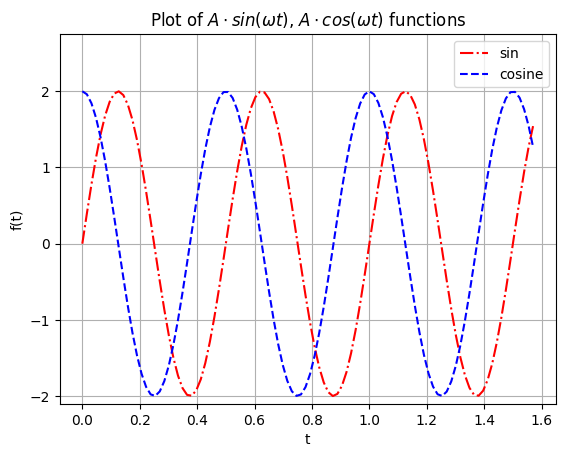

In [17]:
plt.plot(t, y1, 'r-.', label='sin')
plt.plot(t, y2, 'b--', label='cosine')
plt.title('Plot of $A \cdot sin(\omega t)$, $A \cdot cos(\omega t)$ functions')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc="upper right")
plt.ylim(-2.1, 2.75)
plt.grid()
plt.show()

## Advanced Mathematical Plots

Let's draw some plots from advanced calculus to visualize the increasing rsolutions in subplots.

## Fourier Series

### Square wave
defined as:
$$
f(t) = 
\begin{cases}
-1, & -\pi \le t \lt 0\\
1,  & 0 \le t \lt \pi
\end{cases}
$$

fourier series expansion:
$$
f(t) = \frac{4 sin(t)}{\pi} + \frac{4 sin(3t)}{3 \pi} + \frac{4 sin(5t)}{5 \pi} + ...
$$

For this plot, we define a linear space of 400 samples in the range $[-\pi, \pi]$ and calculate the series sums with $2, 3, 4, \text{ and } 8$ terms.

In [4]:
t = np.linspace(-np.pi, np.pi, num=400)
# sums of Fourier series terms with increasing resolutions
f1 = 4*(np.sin(t)/np.pi + np.sin(3*t)/(3*np.pi))
f2 = f1 + 4*np.sin(5*t)/(5*np.pi)
f3 = f2 + 4*np.sin(7*t)/(7*np.pi)

# add next 4 terms to the sum
fn = 0
for n in range(9, 17, 2):
    fn += 4*np.sin(n*t)/(n*np.pi)
f4 = f3 + fn

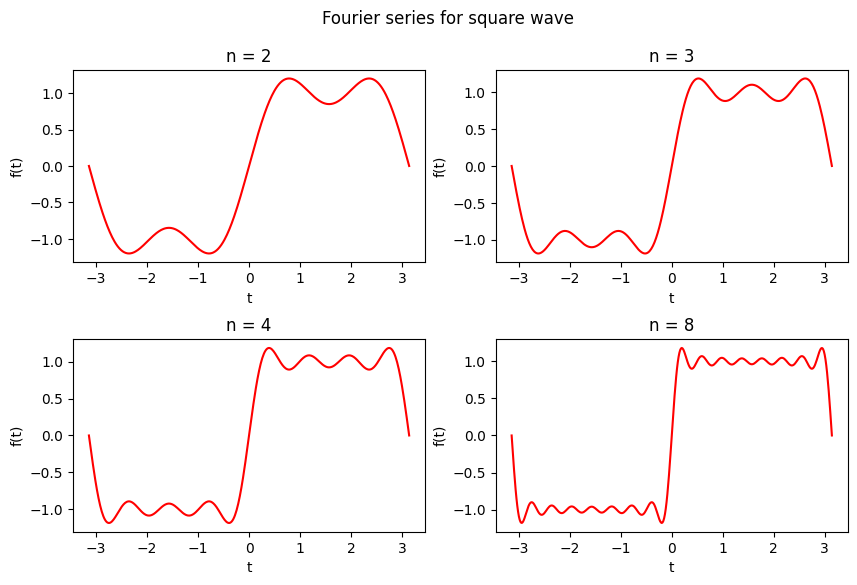

In [5]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.plot(t, f1, 'r-')
plt.title('n = 2')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,2)
plt.plot(t, f2, 'r-')
plt.title('n = 3')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,3)
plt.plot(t, f3, 'r-')
plt.title('n = 4')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,4)
plt.plot(t, f4, 'r-')
plt.title('n = 8')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplots_adjust(hspace=0.4)  # enough space between suplots for label visibility
plt.suptitle('Fourier series for square wave')
plt.show()

### Sawtooth Wave

defined as:
$$
f(t) = \frac{t}{2L},\; 0 \le t \lt 2L
$$

fourier series expansion:
$$
f(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{n=1}^\infty \frac{1}{n} sin \Bigl(\frac{n \pi t}{L} \Bigr)
$$

taking $L = \pi$:
$$
f(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{n=1}^\infty \frac{1}{n} sin \Bigl( n t \Bigr)
$$

For this plot, we define a linear space of 400 samples in the range $[0, 2 \pi]$ and calculate the series sums with $2, 3, 4, \text{ and } 8$ terms.

In [6]:
t = np.linspace(0, 2*np.pi, num=400)
f1 = 1/2 - (1/np.pi)*(np.sin(t) + np.sin(2*t)/2)
f2 = f1 - (1/np.pi)*(np.sin(3*t)/3)
f3 = f2 - (1/np.pi)*(np.sin(4*t)/4)

# add next 4 terms to the sum
fn = 0
for n in range(5, 9):
    fn += (1/np.pi)*(np.sin(n*t)/n)
f4 = f3 - fn

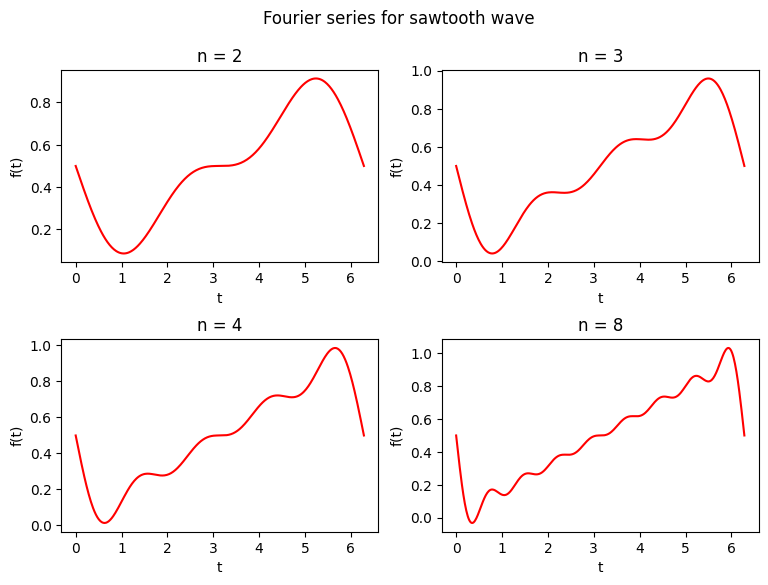

In [7]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
plt.plot(t, f1, 'r-')
plt.title('n = 2')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,2)
plt.plot(t, f2, 'r-')
plt.title('n = 3')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,3)
plt.plot(t, f3, 'r-')
plt.title('n = 4')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,2,4)
plt.plot(t, f4, 'r-')
plt.title('n = 8')
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplots_adjust(hspace=0.4)
plt.suptitle('Fourier series for sawtooth wave')
plt.show()